 # 分類2:客船沈没事故での生存予測

In [79]:
import unittest
import doctest
import os
path = os.path.dirname(os.path.abspath(__file__))

 ## 客船沈没事故から生き残れるかを予測

 ### データの概要

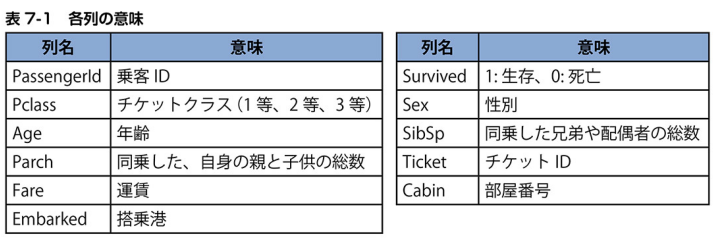

In [80]:
from PIL import Image
file = path + '/img/7-1.png'
im = Image.open(file)
im

 ## データの前処理

 ### CSVファイルの読み込み

 #### CSVファイルの読み込み

In [81]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
# %matplotlib inline
df = pd.read_csv(path + '/data/Survived.csv')
df.head(2) # 先頭2行を表示

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


 ### 正解データの集計-不均衡データ

 #### Survied列のデータ

In [82]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

 ### 欠損値の処理

 #### 欠損値を確認する

In [83]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 #### shapeでデータの行数と列数を確認

In [84]:
df.shape

(891, 11)

 #### Age列とEmbarked列の穴埋め

In [85]:
# Aga列を平均値で穴埋め
df['Age'].fillna(df['Age'].mean(), inplace=True)
# Embarked列を最頻値で穴埋め
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

 #### 特徴量xと正解データtに分割する

In [86]:
# 特徴量として利用する列のリスト
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

x = df[col]
t = df['Survived']

 ### 訓練データとテストデータの分割

 #### 訓練データとテストデータに分割する

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

# x_trainのサイズの確認
x_train.shape

(712, 5)

 ## モデルの作成と学習

 ### モデルの作成と学習-不均衡データの考慮

 #### モデルの作成と学習

In [88]:
model = tree.DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')
model.fit(x_train, y_train) # 学習

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

 ## モデルの評価

 ### 正解率の計算

 #### 決定木モデルの正解率を計算する

In [89]:
model.score(X = x_test, y = y_test)

0.7374301675977654

 ### 過学習

 #### learn関数を定義する

In [90]:
# x:特徴量 t:正解データ depth:木の深さ
def learn(x, t, depth=3):
    x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.2, random_state=0)

    model = tree.DecisionTreeClassifier(max_depth=depth, random_state=0, class_weight='balanced')
    model.fit(x_train, y_train)

    score = model.score(X = x_train, y = y_train)
    score2 = model.score(X = x_test, y = y_test)
    return round(score, 3), round(score2, 3), model

 #### 木の深さによる正解率の変化を確認

In [91]:
for j in range(1, 15): # jは木の深さ（1～14が入る）
    # xは特徴量、tは正解データ
    train_score, test_score, model = learn(x, t, depth=j)
    sentence = '訓練データの正解率{}'
    sentence2 = 'テストデータの正解率{}'
    total_sentence = '深さ{}:' + sentence + sentence2
    print(total_sentence.format(j, train_score, test_score))

深さ1:訓練データの正解率0.659テストデータの正解率0.704
深さ2:訓練データの正解率0.699テストデータの正解率0.732
深さ3:訓練データの正解率0.704テストデータの正解率0.737
深さ4:訓練データの正解率0.698テストデータの正解率0.726
深さ5:訓練データの正解率0.722テストデータの正解率0.737
深さ6:訓練データの正解率0.77テストデータの正解率0.698
深さ7:訓練データの正解率0.771テストデータの正解率0.648
深さ8:訓練データの正解率0.781テストデータの正解率0.631
深さ9:訓練データの正解率0.83テストデータの正解率0.704
深さ10:訓練データの正解率0.851テストデータの正解率0.687
深さ11:訓練データの正解率0.878テストデータの正解率0.676
深さ12:訓練データの正解率0.892テストデータの正解率0.654
深さ13:訓練データの正解率0.909テストデータの正解率0.654
深さ14:訓練データの正解率0.92テストデータの正解率0.654


 ### 欠損値の再埋め込み

 #### Age列の平均値と中央値を確認する

In [92]:
df2 = pd.read_csv(path + '/data/Survived.csv')
print(df2['Age'].mean()) # 平均値の計算
print(df2['Age'].median()) # 中央値の計算

29.69911764705882
28.0


 ### ピボットテーブルによる集計

 #### 小グループ作成の基準となる列を指定

In [93]:
df.groupby('Survived').mean()['Age']

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

 #### Pclass列で集計

In [94]:
df2.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

 #### ピボットテーブル機能を使う

In [95]:
pd.pivot_table(df2, index='Survived', columns='Pclass', values='Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


 #### 引数aggfuncを使って平均値以外の統計量を求める

In [96]:
pd.pivot_table(df2, index='Survived', columns='Pclass', values='Age', aggfunc='median')

Pclass,1,2,3
Survived,,,
0,45.25,30.5,25.0
1,35.00,28.0,22.0


 #### loc機能でAge列の欠損値を穴埋めする

In [97]:
# Age列の欠損値の行を抜き出す（欠損であればTrue）
is_null = df2['Age'].isnull()

# Pclass 1 に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0) & (is_null), 'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1) & (is_null), 'Age'] = 35

# Pclass 2 に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0) & (is_null), 'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1) & (is_null), 'Age'] = 25

# Pclass 3 に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0) & (is_null), 'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1) & (is_null), 'Age'] = 22

 #### learn関数を使ってモデルに再学習させる

In [98]:
# 特徴量として利用する列のリスト
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
x = df2[col]
t = df2['Survived']

for j in range(1,15): # jは木の深さ
    s1, s2, m = learn(x, t, depth = j)
    sentence = '深さ{}:訓練データの制度{}::テストデータの制度{}'
    print(sentence.format(j, s1, s2))

深さ1:訓練データの制度0.659::テストデータの制度0.704
深さ2:訓練データの制度0.664::テストデータの制度0.62
深さ3:訓練データの制度0.722::テストデータの制度0.721
深さ4:訓練データの制度0.75::テストデータの制度0.743
深さ5:訓練データの制度0.779::テストデータの制度0.765
深さ6:訓練データの制度0.796::テストデータの制度0.76
深さ7:訓練データの制度0.84::テストデータの制度0.771
深さ8:訓練データの制度0.861::テストデータの制度0.771
深さ9:訓練データの制度0.895::テストデータの制度0.737
深さ10:訓練データの制度0.913::テストデータの制度0.715
深さ11:訓練データの制度0.928::テストデータの制度0.715
深さ12:訓練データの制度0.94::テストデータの制度0.693
深さ13:訓練データの制度0.955::テストデータの制度0.698
深さ14:訓練データの制度0.963::テストデータの制度0.682


 ### ダミー変数化

 #### groupbyメソッドを使って平均値を求める

In [99]:
sex = df2.groupby('Sex').mean()
sex['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 #### plotメソッドで棒グラフを描く

<Axes: xlabel='Sex'>

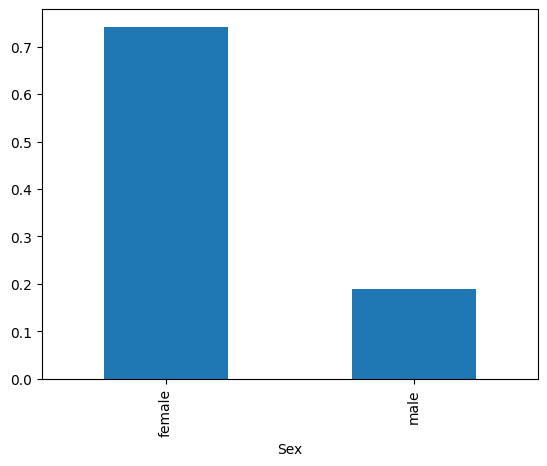

In [100]:
sex['Survived'].plot(kind='bar')

 #### モデルの再学習を行う

In [101]:
# 特徴量として利用する列のリスト
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']

x = df2[col]
t = df2['Survived']

# train_score, test_score, model = learn(x, t) # 学習

 #### get_dummies関数で文字列を数値に変換する

In [102]:
male = pd.get_dummies(df2['Sex'], drop_first=True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


 #### drop_firstを指定しないget_dummies関数の戻り値

In [103]:
pd.get_dummies(df2['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


 #### Embarked列をダミー変数化する

In [104]:
pd.get_dummies(df2['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


 #### drop_firstをFalseにしてみた場合

In [105]:
embarked = pd.get_dummies(df2['Embarked'], drop_first=False)
embarked.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


 ### データフレームの連結

 #### concat関数で２つのデータフレームを横方向に連結

In [106]:
x_temp = pd.concat([x,male], axis=1)

x_temp.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,1
1,1,38.0,1,0,71.2833,female,0


 #### axis = 0で縦方向に連結

In [107]:
tmp = pd.concat([x, x], axis=0)

tmp.shape

(1782, 6)

 ### モデルの再学習

 #### モデルの再学習

In [108]:
x_new = x_temp.drop('Sex', axis=1)
for j in range(1,6): # jは木の深さ
  # x_newは特徴量、tは目的変数
  s1, s2, m = learn(x_new, t, depth=j)
  s = '深さ{}:訓練データ精度{}::テストデータ精度{}'
  print(s.format(j, s1, s2))

深さ1:訓練データ精度0.787::テストデータ精度0.788
深さ2:訓練データ精度0.792::テストデータ精度0.782
深さ3:訓練データ精度0.847::テストデータ精度0.81
深さ4:訓練データ精度0.854::テストデータ精度0.849
深さ5:訓練データ精度0.86::テストデータ精度0.844


 #### 学習したモデルを保存する

In [109]:
# 木の深さを5に指定して改めて学習
s1, s2, model = learn(x_new, t, depth=5)

# モデルの保存
import pickle
file = path + '/model/survived.pkl'
with open(file, 'wb') as f:
    pickle.dump(model, f)

 ## 決定木における特徴量の考察

 ### 特徴量と正解データの関係性

 #### feature_importances_で特徴量重要度を確認

In [110]:
model.feature_importances_

array([0.12292746, 0.24253712, 0.06171509, 0.00280603, 0.05498424,
       0.51503007])

 #### 特徴量重要度をデータフレームに変換して表示

In [111]:
# データフレームに変換
pd.DataFrame(model.feature_importances_, index=x_new.columns)

,0
Pclass,0.122927
Age,0.242537
SibSp,0.061715
Parch,0.002806
Fare,0.054984
male,0.515030


In [112]:
doctest.testmod(verbose=True)
unittest.main(argv=[''], verbosity=2, exit=False)

4 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
    __main__.learn
0 tests in 4 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK
